<a href="https://colab.research.google.com/github/lferodrigues/Metrado-CC-UFJF/blob/main/Computa%C3%A7%C3%A3o_Inteligente_PGCC_2023_2_M%C3%B3dulo_de_L%C3%B3gica_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [ ]:
sujeira = ctrl.Antecedent(np.arange(0, 100, 1), 'sujeira')
mancha = ctrl.Antecedent(np.arange(0, 100, 1), 'mancha')

tempo = ctrl.Consequent(np.arange(0, 61, 1), 'tempo')

In [ ]:
sujeira.automf(number = 3, names = ['PS', 'MS', 'GS'])
mancha.automf(number = 3, names = ['SM', 'MM', 'GM'])

tempo.automf(number = 5, names = ['MC', 'C', 'M', 'L', 'ML'])

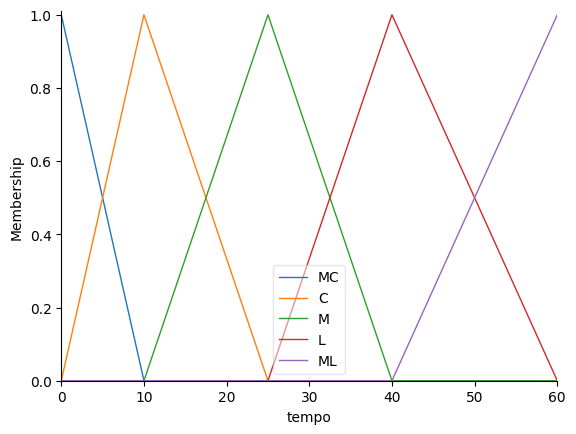

In [ ]:
tempo['MC'] = fuzz.trimf(tempo.universe, [0, 0, 10])
tempo['C'] = fuzz.trimf(tempo.universe, [0, 10, 25])
tempo['M'] = fuzz.trimf(tempo.universe, [10, 25, 40])
tempo['L'] = fuzz.trimf(tempo.universe, [25, 40, 60])
tempo['ML'] = fuzz.trimf(tempo.universe, [40, 60, 60])

tempo.view()

In [ ]:
regra1 = ctrl.Rule(sujeira['PS'] & mancha['SM'], tempo['MC'])
regra2 = ctrl.Rule(sujeira['PS'] & mancha['MM'], tempo['M'])
regra3 = ctrl.Rule(sujeira['PS'] & mancha['GM'], tempo['L'])
regra4 = ctrl.Rule(sujeira['MS'] & mancha['SM'], tempo['C'])
regra5 = ctrl.Rule(sujeira['MS'] & mancha['MM'], tempo['M'])
regra6 = ctrl.Rule(sujeira['MS'] & mancha['GM'], tempo['L'])
regra7 = ctrl.Rule(sujeira['GS'] & mancha['SM'], tempo['M'])
regra8 = ctrl.Rule(sujeira['GS'] & mancha['MM'], tempo['L'])
regra9 = ctrl.Rule(sujeira['GS'] & mancha['GM'], tempo['ML'])

In [ ]:
recomendacao_tempo = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

recomendacao = ctrl.ControlSystemSimulation(recomendacao_tempo)

35.87192550927406


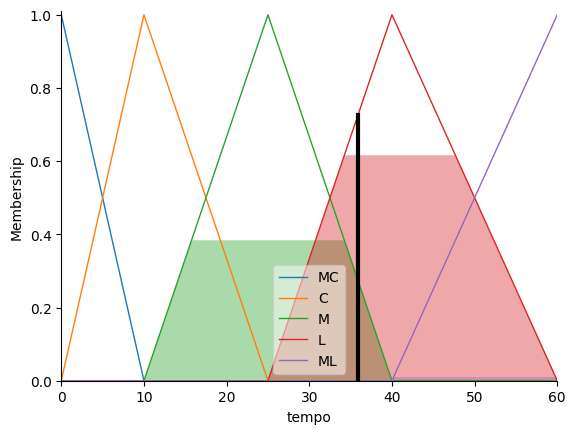

In [ ]:
recomendacao.input['sujeira'] = 80
recomendacao.input['mancha'] = 50
recomendacao.compute()

print(recomendacao.output['tempo'])
tempo.view(sim = recomendacao)